In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
from pprint import pprint
import codecs
import re
import requests
import time

import dns

import urllib.parse
from IPython.display import clear_output

In [181]:
count = 0
sum_coordinates = 0
sum_place  = 0
sum_location = 0
location_list = []

with codecs.open(r'C:\Users\Marcelo\Downloads\amostra.json', 'r', 'utf-8') as f:
    for line in f:
        count += 1
        if count % 20000 == 0: 
            clear_output()
            print(count, 'lines already processed.')
        tweet = json.loads(line)
        if tweet['coordinates'] is not None: sum_coordinates += 1
        if tweet['place'] is not None: sum_place += 1
        location_list.append(tweet['user']['location'])

200000 lines already processed.


* Exemplo de município da API do nominatim: http://oxumare.ctweb.inweb.org.br:8081/search?q=Par%C3%A1+de+Minas&format=json&addressdetail:1

#### error types
* ConnectionError: ('Connection aborted.', ConnectionAbortedError(10053, 'An established connection was aborted by the software in your host machine', None, 10053, None))
* ConnectionError: HTTPConnectionPool(host='oxumare.ctweb.inweb.org.br', port=8081): Max retries exceeded with url: /search?q=S%C3%A3o+Paulo&format=json&addressdetail:1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001601C9142E8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
* ConnectionError: HTTPConnectionPool(host='oxumare.ctweb.inweb.org.br', port=8081): Max retries exceeded with url: /search?q=Londrina&format=json&addressdetail:1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000016027088588>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
for location in location_list:
    location = re.sub('(.*),.*', r'\1', location)
    location = urllib.parse.quote(location)
    location = re.sub('\%20', '+', location)
    url = 'http://oxumare.ctweb.inweb.org.br:8081/search?q='+location+'&format=json&addressdetail:1'
    try: r = requests.get(url)
    except Exception as error:
        print("\033[91m", error)
        print('count: ', count_temp)
        error = str(error)
        if '10053' in error or 'Errno 11001' in error:
            time.sleep(30)
        r = requests.get(url)
        pass
    if r.text=='[]' or r.text=='': continue
    location_json = json.loads(r.text)[0]
    country = location_json['display_name'][-6:]
    if location_json['type'] == 'city' and country == 'Brasil':
        true_loc_list.append(location_json)
    count_temp+=1
    if count_temp % 200 == 0: 
        clear_output()
        print(count_temp, 'lines already processed.')

In [328]:
count_temp

108402

In [329]:
len(true_loc_list)

48823

In [330]:
len(true_loc_list)/count_temp*100

45.038836921828015

In [331]:
sum_location = len(true_loc_list)

In [347]:
#amostragem rápida
for loc in true_loc_list[:10]:
    municipality = loc['display_name']
    municipality = re.sub('(.*?),.*', r'\1', municipality)
    print(municipality)

SP
SP
Duque de Caxias
Florianópolis
Diadema
Apucarana
Florianópolis
BH
Teresina
BH


In [332]:
print(count, sum_coordinates,sum_place, sum_location)

200000 196 5871 48823


In [334]:
perc_coordinates = sum_coordinates/count*100
perc_place = sum_place/count*100
perc_location = sum_location/count_temp*100

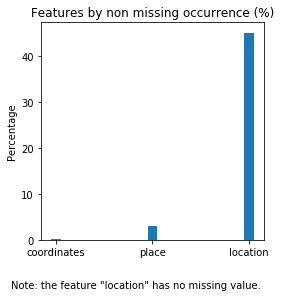

In [337]:
objects = ('coordinates', 'place', 'location')
y_pos = np.arange(len(objects))
performance = [perc_coordinates,perc_place, perc_location]

plt.figure(figsize=(4,4))
plt.bar(y_pos, performance, width = 0.1, align='center')
plt.xticks(y_pos, objects)
#plt.yticks(np.arange(0, 110, step=10))
plt.ylabel('Percentage')
plt.title('Features by non missing occurrence (%)')
plt.annotate('Note: the feature "location" has no missing value.', (0,0), (-30, -40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.show()

In [338]:
print('coordinates (%): ', perc_coordinates)
print('places (%):', perc_place)
print('location (%):', perc_location)

coordinates (%):  0.098
places (%): 2.9354999999999998
location (%): 45.038836921828015
